# Setup

In [1]:
!pip install xgboost > /dev/null

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import xgboost as xgb

from xgboost.callback import EvaluationMonitor

In [3]:
# Display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

In [4]:
# Read features
pd_train = pd.read_parquet("./data/clean/train.parquet")
pd_valid = pd.read_parquet("./data/clean/valid.parquet")
pd_test = pd.read_parquet("./data/clean/test.parquet")

# Train

In [5]:
# Train setup
X_train = pd_train.filter(like="feature")
X_valid = pd_valid.filter(like="feature")
y_train = pd_train.action
y_valid = pd_valid.action

clf = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=11,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.7,
    missing=-999,
    random_state=2020,
    tree_method='gpu_hist',
    use_label_encoder=False)

In [6]:
%%time
clf.fit(
    X=X_train, 
    y=y_train, 
    verbose=False,
    eval_metric=['logloss', 'error'],
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    callbacks=[EvaluationMonitor(period=100)])

[0]	validation_0-logloss:0.69234	validation_0-error:0.47248	validation_1-logloss:0.69304	validation_1-error:0.48510
[100]	validation_0-logloss:0.64780	validation_0-error:0.34322	validation_1-logloss:0.69182	validation_1-error:0.47567
[200]	validation_0-logloss:0.61821	validation_0-error:0.27430	validation_1-logloss:0.69364	validation_1-error:0.47697
[300]	validation_0-logloss:0.59226	validation_0-error:0.21899	validation_1-logloss:0.69536	validation_1-error:0.47933
[400]	validation_0-logloss:0.56930	validation_0-error:0.17771	validation_1-logloss:0.69667	validation_1-error:0.48057
[499]	validation_0-logloss:0.54841	validation_0-error:0.14704	validation_1-logloss:0.69799	validation_1-error:0.48168
CPU times: user 1min 13s, sys: 32 s, total: 1min 45s
Wall time: 1min 41s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=-999, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=2020, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [23]:
%%time
clf.fit(
    X=X_train, 
    y=y_train, 
    verbose=False,
    eval_metric=['logloss', 'error'],
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    callbacks=[EvaluationMonitor(period=100)])

[0]	validation_0-logloss:0.69228	validation_0-error:0.47086	validation_1-logloss:0.69300	validation_1-error:0.49004
[100]	validation_0-logloss:0.65023	validation_0-error:0.35484	validation_1-logloss:0.68974	validation_1-error:0.47137
[200]	validation_0-logloss:0.62557	validation_0-error:0.29644	validation_1-logloss:0.69111	validation_1-error:0.47524
[300]	validation_0-logloss:0.60442	validation_0-error:0.25220	validation_1-logloss:0.69180	validation_1-error:0.47507
[400]	validation_0-logloss:0.58471	validation_0-error:0.21359	validation_1-logloss:0.69286	validation_1-error:0.47439
[499]	validation_0-logloss:0.56583	validation_0-error:0.18195	validation_1-logloss:0.69373	validation_1-error:0.47472
CPU times: user 1min 21s, sys: 37.3 s, total: 1min 58s
Wall time: 1min 54s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=-999, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=2020, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# Evaluate

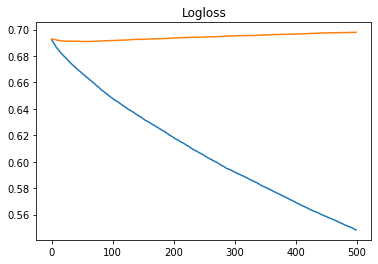

Minimum: 0.690969 (n_trees=62)


In [28]:
train_logloss = clf.evals_result()['validation_0']['logloss']
valid_logloss = clf.evals_result()['validation_1']['logloss']
plt.plot(train_logloss)
plt.plot(valid_logloss)
plt.title("Logloss")
plt.show()

srs_valid = pd.Series(valid_logloss)
print("Minimum: {} (n_trees={})".format(
    srs_valid[srs_valid.idxmin()], srs_valid.idxmin() + 1))

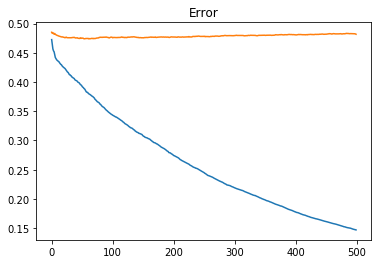

Minimum: 0.473723 (n_trees=62)


In [29]:
train_error = clf.evals_result()['validation_0']['error']
valid_error = clf.evals_result()['validation_1']['error']
plt.plot(train_error)
plt.plot(valid_error)
plt.title("Error")
plt.show()

srs_valid = pd.Series(valid_error)
print("Minimum: {} (n_trees={})".format(
    srs_valid[srs_valid.idxmin()], srs_valid.idxmin() + 1))